# Lecture 18

We focus on fundamental statistical applications using python and in particular the `stats` module in `scipy`

## Imports

In [1]:
from scipy import stats

In [2]:
from scipy import optimize

In [3]:
import numpy as np
import random

In [4]:
import matplotlib.pyplot as plt

## Descriptive statistics

* mean or average: $$\mu=\bar{X}=\frac{1}{N}\sum_{i=1}^Nx_i$$
* variance (mean of the squared distance from the mean):  $$\sigma^2=\frac{1}{N}\sum_{i=1}^N(x_i-\mu)^2$$
* standard deviation (std): 
$$
\sigma =\sqrt{\frac{1}{N}\sum_{i=1}^N(x_i-\mu)^2}
$$

In [6]:
x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])

In [7]:
np.mean(x)

3.1

In [8]:
np.median(x)

3.0

In [9]:
x.min(), x.max()

(0.9, 6.7)

In [10]:
x.var()

3.0700000000000007

In [11]:
x.std()

1.7521415467935233

In [12]:
x.var(ddof=1)

3.5085714285714293

In [13]:
x.std(ddof=1)

1.8731181032095732

## Random numbers

In [14]:
random.random()

0.6451162641263557

In [18]:
random.randint(0, 10)  # 0 and 10 inclusive

9

In [19]:
np.random.rand(5) # uniform distribution

array([0.20529791, 0.4083786 , 0.64479687, 0.3571662 , 0.72704511])

In [21]:
np.random.randn(2, 4)

array([[ 0.57104337,  1.99311599,  1.50752152, -1.08686405],
       [ 0.41046141, -1.01330233, -0.19721135,  1.49969552]])

In [22]:
np.random.randint(10, size=10)

array([6, 2, 0, 4, 1, 1, 4, 8, 8, 4])

In [23]:
np.random.randint(low=10, high=20, size=(2, 10))

array([[14, 12, 15, 14, 19, 12, 10, 17, 13, 15],
       [15, 12, 10, 19, 17, 14, 17, 18, 18, 11]])

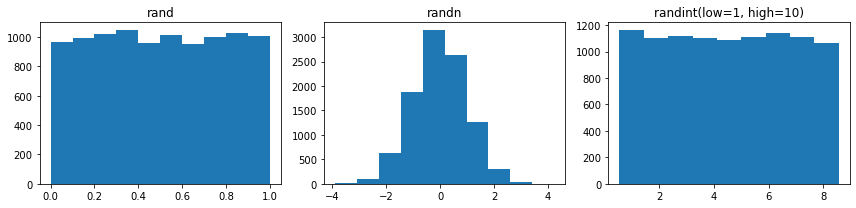

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(np.random.rand(10000))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(10000))
axes[1].set_title("randn")
axes[2].hist(np.random.randint(low=1, high=10, size=10000), bins=9, align='left')
axes[2].set_title("randint(low=1, high=10)")

fig.tight_layout()


# Probability distributions and random variables

* The set of possible outcomes of a random process is called the *sample space*

    eg. coin tossing, sample space={head, tail}
    

* A random variable is a mapping from the sampe space to the real numbers or to integers:
    
    a possible random variable for coin tossing takes value 0 for head and 1 for tail

* pdf/pmf: probability distribution funciton (continues) or probability mass function (discrete)


In [27]:
X = stats.norm(1, 0.5) # normal distributed random variable with mean 1.0 and std 0.5

In [28]:
X.mean()

1.0

In [29]:
X.median()

1.0

In [30]:
X.std()

0.5

In [31]:
X.var()

0.25

In [33]:
X.stats() # we get the mean and variance values

(array(1.), array(0.25))

In [35]:
X.pdf([0, 1, 2])  # evaluate the pdf at certain values

array([0.10798193, 0.79788456, 0.10798193])

In [37]:
stats.norm(1, 0.5).stats()

(array(1.), array(0.25))

In [38]:
stats.norm.stats(loc=2, scale=0.5) # we can also specify a norm distribution passing loc and scale values

(array(2.), array(0.25))

In [39]:
X.interval(0.95)  # compute the confidence interval

(0.020018007729972975, 1.979981992270027)

In [40]:
X.interval(0.99)

(-0.2879146517744502, 2.28791465177445)

In [41]:
def plot_rv_distribution(X, axes=None):
    """Plot the PDF/PMF of a given random variable"""
    if axes is None:
        fig, axes = plt.subplots(1, 1, figsize=(12, 3))
    
    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)

    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)

    if hasattr(X.dist, 'pdf'):
        axes.plot(x999, X.pdf(x999), label="PDF")
        axes.fill_between(x95, X.pdf(x95), alpha=0.25)
    else:
        # discrete rv does not have a pdf method, so plot PMF instead
        x999_int = np.unique(x999.astype(int))
        axes.bar(x999_int, X.pmf(x999_int), label="PMF")

    
 
    
    return axes

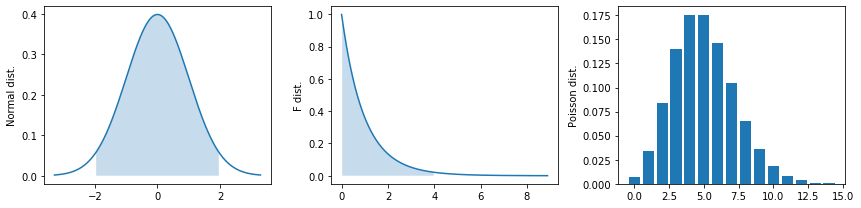

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

X = stats.norm() # normal dist (0.,1.)
plot_rv_distribution(X,axes[0])
axes[0].set_ylabel("Normal dist.")
X = stats.f(2, 50)  # F distribution
plot_rv_distribution(X,axes[1])
axes[1].set_ylabel("F dist.")
X = stats.poisson(5)  # discrete poisson distribution
plot_rv_distribution(X,axes[2])
axes[2].set_ylabel("Poisson dist.")

fig.tight_layout()


In [44]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
    """ Plot the PDF and histogram of samples of a continuous random variable"""
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)

    ax.plot(x, X.pdf(x), label="PDF", lw=3)    
    ax.hist(X_samples, label="samples", density=1, bins=75)
    ax.set_xlim(*x_lim)
    ax.legend()
    
    if title:
        ax.set_title(title)
    return ax

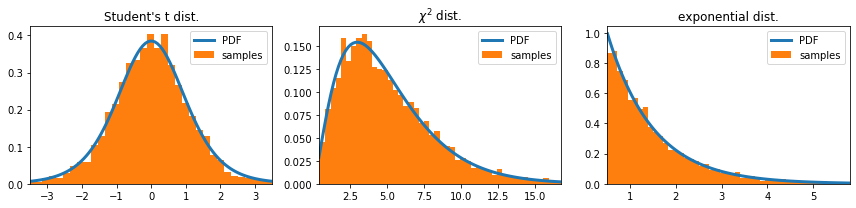

In [48]:
# sample size 2000 is fairly large, and the hist graph match well with the PDF 
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
X = stats.t(7.0)  # student t distibution
plot_dist_samples(X, X.rvs(4000), "Student's t dist.", ax=axes[0]) 
X = stats.chi2(5.0) # chi square distribution
plot_dist_samples(X, X.rvs(4000), r"$\chi^2$ dist.", ax=axes[1])
X = stats.expon(0.5) # exponential distribution
plot_dist_samples(X, X.rvs(4000), "exponential dist.", ax=axes[2])
fig.tight_layout()
